In [1]:
import pandas as pd
df = pd.read_csv(r"../Dataset/winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [3]:
quality_map={
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [4]:
df.quality = df.quality.map(quality_map)

In [10]:
#shuffle the dataset, and reset the index
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [7]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)

cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

clf.fit(df_train[cols], df_train.quality)


DecisionTreeClassifier(max_depth=3)

In [11]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])
train_acc = metrics.accuracy_score(df_train.quality, train_predictions)
test_acc = metrics.accuracy_score(df_test.quality, test_predictions)

In [12]:
print(train_acc)
print(test_acc)

0.589
0.5926544240400667


## test in different depth of DT

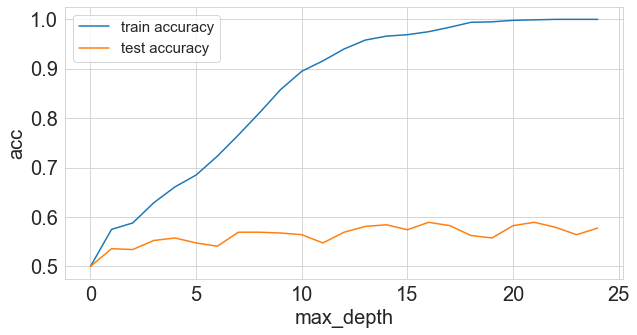

In [13]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

train_accs = [0.5]
test_accs = [0.5]

for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # define the used features
    cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']
    clf.fit(df_train[cols], df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_acc = metrics.accuracy_score(df_train.quality, train_predictions)
    test_acc = metrics.accuracy_score(df_test.quality, test_predictions)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accs, label="train accuracy")
plt.plot(test_accs, label="test accuracy")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("acc", size=20)
plt.show()


## build regression model and apply stratified k-fold

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    data['kfold'] = -1
    data = data.sample(frac=1).reset_index(drop=True)

    # calculate bin
    num_bins = np.floor(1+np.log2(len(data))).astype(int)
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins = num_bins, labels=False
    )
    kf = model_selection.StratifiedKFold(n_splits=5)
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

    data = data.drop("bins", axis=1)
    return data

if __name__ == "__main__":
    X, y = datasets.make_regression(
        n_samples=15000, n_features=100, n_targets=1
    )

    df = pd.DataFrame(
        X, 
        columns = [f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:, "target"] = y

    df = create_folds(df)

d:\software\anaconda\envs\ML\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
